In [2]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
# contar cantidad de palabras con mayuscula
count = 0
text = "AlamBreTe"
for character in text:
        if character.isupper():
            count += 1
print(count)

3


In [4]:
# contar cantidad de palabras con mayuscula en un texto "demo.txt"
letters = set()
with open(r'C:\Users\Usuario\Documents\R Files\demo.txt') as countletter:
    count = 0
    text = countletter.read()
    for character in text:
        if character.isupper():
            count += 1
            letters.add(character)
print(count)

75


In [5]:
tabla=pd.read_csv(r"C:\Users\Usuario\Documents\R Files\argentina (2).csv",delimiter=",")
t2=pd.DataFrame(tabla)
t2

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,6.484938e+06,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [6]:
#tabla.columns
#tabla.head(6)
#tabla.tail(6)
# tabla.shape
# 22 rows, 11 columns
# tipo de datos de las columnas
tabla.dtypes
# Muestra indicadores estadisticos basicos: medidas de posicion, centralizacion y dispersion
tabla.describe()

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
count,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,3.055703e+07,3.225541,9.925625,12.677304,1.724866,50.768836,4.986364,1.686352e+06,0.000007,0.004894
std,6.183100e+07,1.851496,3.779530,7.216860,1.152438,9.181037,3.498339,3.219828e+06,0.000004,0.001522
min,3.807057e+06,0.791485,3.398774,3.839852,0.204093,29.232100,0.800000,2.739640e+05,0.000002,0.002821
25%,8.041587e+06,1.989810,7.472754,7.569677,0.812617,45.548300,3.025000,5.143715e+05,0.000004,0.004061
50%,1.096416e+07,2.743675,9.142440,10.865881,1.437767,49.370500,4.000000,7.775305e+05,0.000006,0.004757
75%,1.999452e+07,3.686190,12.500143,16.100647,2.514496,56.915800,5.875000,1.230606e+06,0.000009,0.005334
max,2.926899e+08,7.517580,17.035583,31.479527,3.864265,65.812600,16.200000,1.562508e+07,0.000019,0.010175


In [7]:
tabla.dtypes

province                   object
gdp                       float64
illiteracy                float64
poverty                   float64
deficient_infra           float64
school_dropout            float64
no_healthcare             float64
birth_mortal              float64
pop                         int64
movie_theatres_per_cap    float64
doctors_per_cap           float64
dtype: object

In [8]:
# Muestra las columnas seleccionadas del dataframe
t2[['province','gdp','birth_mortal']]


,province,gdp,birth_mortal
0,Buenos Aires,2.926899e+08,4.4
1,Catamarca,6.150949e+06,1.5
2,Córdoba,6.936374e+07,4.8
3,Corrientes,7.968013e+06,5.9
4,Chaco,9.832643e+06,7.5
5,Chubut,1.774785e+07,3.0
6,Entre Ríos,2.074341e+07,3.1
7,Formosa,3.807057e+06,16.2
8,Jujuy,6.484938e+06,3.7
9,La Pampa,6.990262e+06,7.2


In [9]:
# modificar nombre columna
t2.rename({'province':'PROVINCIA'},axis=1,inplace=True)


In [10]:
# Crear una columna llamada Score, que realice operaciones entre las demas columnas
t2['Score']=(t2['poverty']+t2['pop'])/t2['birth_mortal']
t2

,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836,3.551157e+06
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495,1.682386e+05
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605,1.407033e+05
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498,1.697054e+05
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679,3.987101e+05
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440,3.272710e+04
8,Jujuy,6.484938e+06,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958,1.819785e+05
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415,4.429922e+04


In [11]:
# Eliminar la columna "pronvince"
t2.drop(['deficient_infra'], axis = 'columns', inplace=True)


In [12]:
mi=np.min(t2['poverty'],axis=0)
print(mi)

md=np.median(t2['poverty'],axis=0)
print(md) 

mx=np.max(t2['poverty'],axis=0)
print(mx)

print(mi,md,mx)

3.3987736963492154
9.142439505726308
17.035583210850106
3.3987736963492154 9.142439505726308 17.035583210850106


In [13]:
# Calcular cuartiles del atributo 'poverty'
min=t2['poverty'].min()
Q1=t2['poverty'].quantile(0.25)
Q2=t2['poverty'].quantile(0.50)
Q3=t2['poverty'].quantile(0.75)
IQR=Q3-Q1 # Threshold #
max=t2['poverty'].max()

mu=t2['poverty'].mean()
sd=t2['poverty'].std()

Value=[min,Q1,Q2,Q3,IQR,max, mu,sd]
Col=["min","25%","50%","75%","IQR","max","median", "st_dev"]
Estadistics=pd.DataFrame(Value,Col)
Estadistics

,0
min,3.398774
25%,7.472754
50%,9.142440
75%,12.500143
IQR,5.027389
max,17.035583
median,9.925625
st_dev,3.779530


In [14]:
q1=7.472753782258431
q2=9.142439505726308
q3=12.500143

q1,q2,q3

# Crea columna vacia
t2['poverty_index']=''

#establece condicionales para col. vacia
t2.loc[t2['poverty']<q1,'poverty_index'] ='Low'
t2.loc[(t2['poverty']>=q1)&(t2['poverty']<q2),'poverty_index'] ='Middle'
t2.loc[t2['poverty']>=q2,'poverty_index'] ='High'
t2


,PROVINCIA,gdp,illiteracy,poverty,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index
0,Buenos Aires,2.926899e+08,1.383240,8.167798,0.766168,48.7947,4.4,15625084,0.000006,0.004836,3.551157e+06,Middle
1,Catamarca,6.150949e+06,2.344140,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High
2,Córdoba,6.936374e+07,2.714140,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low
3,Corrientes,7.968013e+06,5.602420,12.747191,3.864265,62.1103,5.9,992595,0.000004,0.004495,1.682386e+05,High
4,Chaco,9.832643e+06,7.517580,15.862619,2.577462,65.5104,7.5,1055259,0.000003,0.003605,1.407033e+05,High
5,Chubut,1.774785e+07,1.548060,8.051752,0.586309,39.5473,3.0,509108,0.000016,0.004498,1.697054e+05,Middle
6,Entre Ríos,2.074341e+07,3.185580,7.288751,1.887188,48.6571,3.1,1235994,0.000006,0.004679,3.987101e+05,Low
7,Formosa,3.807057e+06,4.610640,17.035583,2.268974,65.8126,16.2,530162,0.000004,0.003440,3.272710e+04,High
8,Jujuy,6.484938e+06,2.151390,13.367965,0.721295,54.1615,3.7,673307,0.000003,0.003958,1.819785e+05,High
9,La Pampa,6.990262e+06,1.539300,3.398774,0.204093,45.4764,7.2,318951,0.000019,0.005415,4.429922e+04,Low


In [15]:
t2['poverty'].describe()

count    22.000000
mean      9.925625
std       3.779530
min       3.398774
25%       7.472754
50%       9.142440
75%      12.500143
max      17.035583
Name: poverty, dtype: float64

In [16]:
#Calcular mu y sd de una columna
mu=np.mean(t2['poverty'],axis=0)
sd=np.std(t2['poverty'],axis=0)

print(mu)
print(sd)

mubm=np.mean(t2['birth_mortal'],axis=0)
sdbm=np.std(t2['birth_mortal'],axis=0)
mubm,sdbm


9.925624545390745
3.6926329531457704


(4.986363636363635, 3.4179067829388656)

In [17]:
# Calcula valores normalizados (z-score) de las variables: poberty y birth_mortal
t2['Z-poverty']=(t2['poverty']-mu)/sd
t2['Z-bith_mort']=(t2['birth_mortal']-mubm)/sdbm
t2

,PROVINCIA,gdp,illiteracy,poverty,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,Z-poverty,Z-bith_mort
0,Buenos Aires,2.926899e+08,1.383240,8.167798,0.766168,48.7947,4.4,15625084,0.000006,0.004836,3.551157e+06,Middle,-0.476036,-0.171556
1,Catamarca,6.150949e+06,2.344140,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
2,Córdoba,6.936374e+07,2.714140,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
3,Corrientes,7.968013e+06,5.602420,12.747191,3.864265,62.1103,5.9,992595,0.000004,0.004495,1.682386e+05,High,0.764107,0.267309
4,Chaco,9.832643e+06,7.517580,15.862619,2.577462,65.5104,7.5,1055259,0.000003,0.003605,1.407033e+05,High,1.607794,0.735432
5,Chubut,1.774785e+07,1.548060,8.051752,0.586309,39.5473,3.0,509108,0.000016,0.004498,1.697054e+05,Middle,-0.507462,-0.581164
6,Entre Ríos,2.074341e+07,3.185580,7.288751,1.887188,48.6571,3.1,1235994,0.000006,0.004679,3.987101e+05,Low,-0.714090,-0.551906
7,Formosa,3.807057e+06,4.610640,17.035583,2.268974,65.8126,16.2,530162,0.000004,0.003440,3.272710e+04,High,1.925444,3.280849
8,Jujuy,6.484938e+06,2.151390,13.367965,0.721295,54.1615,3.7,673307,0.000003,0.003958,1.819785e+05,High,0.932218,-0.376360
9,La Pampa,6.990262e+06,1.539300,3.398774,0.204093,45.4764,7.2,318951,0.000019,0.005415,4.429922e+04,Low,-1.767533,0.647658


In [18]:
# Repetir una fila de un data frame n veces=3
#rep=[3 if val==4.4 else 1 for val in t2['birth_mortal']]
#t2=t2.loc[np.repeat(t2.index.values,rep)]
#print(len(t2))

# Crear un diccionario con los datos que queremos repetir. key:dato, value: cantidad de veces.
dicc={1.5:3,4.8:4} # repite el valor,3 y 4 veces
reps=[dicc[val] if val in dicc else 1 for val in t2['birth_mortal']]
t2=t2.loc[np.repeat(t2.index.values,reps)]
print(len(t2))
t2

27


,PROVINCIA,gdp,illiteracy,poverty,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,Z-poverty,Z-bith_mort
0,Buenos Aires,2.926899e+08,1.383240,8.167798,0.766168,48.7947,4.4,15625084,0.000006,0.004836,3.551157e+06,Middle,-0.476036,-0.171556
1,Catamarca,6.150949e+06,2.344140,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
1,Catamarca,6.150949e+06,2.344140,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
1,Catamarca,6.150949e+06,2.344140,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
2,Córdoba,6.936374e+07,2.714140,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
2,Córdoba,6.936374e+07,2.714140,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
2,Córdoba,6.936374e+07,2.714140,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
2,Córdoba,6.936374e+07,2.714140,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
3,Corrientes,7.968013e+06,5.602420,12.747191,3.864265,62.1103,5.9,992595,0.000004,0.004495,1.682386e+05,High,0.764107,0.267309
4,Chaco,9.832643e+06,7.517580,15.862619,2.577462,65.5104,7.5,1055259,0.000003,0.003605,1.407033e+05,High,1.607794,0.735432


In [19]:
# Modificar el valor de una celda de un df
#print(t2.iloc[1,0]) # muestra el dato de la 2da fila de la 8va columna.
t2.iloc[1,0]="CatEmarca"
t2.iloc[2,0]="Catamerca"
t2.iloc[3,0]="CatamerKado"

In [20]:
# Reemplazar datos. El parametro de la f. replace es un diccionario {key:value,key:value}, inplace:True, reemplaza el dato en el Df original
t2.illiteracy.replace({1.548060:np.nan,1.5393:'', 2.963260:''},inplace=True)
t2.no_healthcare.replace({39.547300:np.nan,45.476400:np.nan,52.968400:np.nan},inplace=True)
t2


,PROVINCIA,gdp,illiteracy,poverty,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,Z-poverty,Z-bith_mort
0,Buenos Aires,2.926899e+08,1.38324,8.167798,0.766168,48.7947,4.4,15625084,0.000006,0.004836,3.551157e+06,Middle,-0.476036,-0.171556
1,CatEmarca,6.150949e+06,2.34414,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
1,Catamerca,6.150949e+06,2.34414,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
1,CatamerKado,6.150949e+06,2.34414,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
2,Córdoba,6.936374e+07,2.71414,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
2,Córdoba,6.936374e+07,2.71414,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
2,Córdoba,6.936374e+07,2.71414,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
2,Córdoba,6.936374e+07,2.71414,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
3,Corrientes,7.968013e+06,5.60242,12.747191,3.864265,62.1103,5.9,992595,0.000004,0.004495,1.682386e+05,High,0.764107,0.267309
4,Chaco,9.832643e+06,7.51758,15.862619,2.577462,65.5104,7.5,1055259,0.000003,0.003605,1.407033e+05,High,1.607794,0.735432


In [21]:
# Reemplazar cadena de caracter Cat% por Catamarca  ### VER REGEX Regular Expression#
t2['PROVINCIA']=t2['PROVINCIA'].str.replace(r"Cat[A-Z,a-z]{1,8}",'Catamarca', regex = True, case = False)

# Reemplazar cadena de caracter %rdo% por Córdoba  ### VER REGEX Regular Expression#  
t2['PROVINCIA']=t2['PROVINCIA'].str.replace(r"[A-Z,a-z]{1,9}rdo[A-Z,a-z]{1,9}","Córdoba", regex = True, case = False)
t2
#r"vin[A-Z,a-z]{1,9}\sid\susurp[A-Z,a-z]{1,9}",  vinculado_id_usurpado  vin[A-Z,a-z]{1,9}\sid\susurp[A-Z,a-z]{1,9}  "" \s signifca _ ""

,PROVINCIA,gdp,illiteracy,poverty,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,Z-poverty,Z-bith_mort
0,Buenos Aires,2.926899e+08,1.38324,8.167798,0.766168,48.7947,4.4,15625084,0.000006,0.004836,3.551157e+06,Middle,-0.476036,-0.171556
1,Catamarca,6.150949e+06,2.34414,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
1,Catamarca,6.150949e+06,2.34414,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
1,Catamarca,6.150949e+06,2.34414,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
2,Córdoba,6.936374e+07,2.71414,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
2,Córdoba,6.936374e+07,2.71414,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
2,Córdoba,6.936374e+07,2.71414,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
2,Córdoba,6.936374e+07,2.71414,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
3,Corrientes,7.968013e+06,5.60242,12.747191,3.864265,62.1103,5.9,992595,0.000004,0.004495,1.682386e+05,High,0.764107,0.267309
4,Chaco,9.832643e+06,7.51758,15.862619,2.577462,65.5104,7.5,1055259,0.000003,0.003605,1.407033e+05,High,1.607794,0.735432


In [22]:
# convertir object to float
t2['illiteracy']=pd.to_numeric(t2['illiteracy'])
t2.dtypes

PROVINCIA                  object
gdp                       float64
illiteracy                float64
poverty                   float64
school_dropout            float64
no_healthcare             float64
birth_mortal              float64
pop                         int64
movie_theatres_per_cap    float64
doctors_per_cap           float64
Score                     float64
poverty_index              object
Z-poverty                 float64
Z-bith_mort               float64
dtype: object

In [23]:
# ML1: Decision Tree
#==============================================
#1. Data preprocessing (OneHotEncoder)
#2. Splitting data for training and testing
#3. Preparing a classification model
#4. Assembling all of the steps using pipeline
#5. Training the model
#6. Running predictions on the model
#7. Evaluating and visualizing model performance

In [24]:
# 1. Data preprocessing (OneHotEncoder)

# Generar un array : vector
x=t2['poverty_index'].value_counts()
x


High      13
Low        9
Middle     5
Name: poverty_index, dtype: int64

['High' 'Middle' 'Low']
[11  6  5]
      0       1    2
0  High  Middle  Low
1    11       6    5


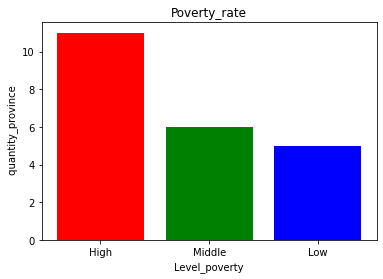

In [25]:
# graficar "poverty_index"

# Generar un array : vector
x1=np.array(["High","Middle","Low"])
y1=np.array([11,6,5])
print(x1)
print(y1)

#Mostrar una tabla (Data Frame) con x,y
k=pd.DataFrame([x1,y1])
print(k)
# graficar una curva
plt.bar(x1,y1,color=["red","green","blue"])
plt.title("Poverty_rate")
plt.ylabel(" quantity_province")
plt.xlabel("Level_poverty")

plt.show()

In [26]:
# Eliminar filas duplicadas
t2_np=t2.drop_duplicates(inplace=True) 

In [27]:
t2

,PROVINCIA,gdp,illiteracy,poverty,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,Z-poverty,Z-bith_mort
0,Buenos Aires,2.926899e+08,1.383240,8.167798,0.766168,48.7947,4.4,15625084,0.000006,0.004836,3.551157e+06,Middle,-0.476036,-0.171556
1,Catamarca,6.150949e+06,2.344140,9.234095,0.951963,45.0456,1.5,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
2,Córdoba,6.936374e+07,2.714140,5.382380,1.035056,45.7640,4.8,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
3,Corrientes,7.968013e+06,5.602420,12.747191,3.864265,62.1103,5.9,992595,0.000004,0.004495,1.682386e+05,High,0.764107,0.267309
4,Chaco,9.832643e+06,7.517580,15.862619,2.577462,65.5104,7.5,1055259,0.000003,0.003605,1.407033e+05,High,1.607794,0.735432
5,Chubut,1.774785e+07,NaN,8.051752,0.586309,NaN,3.0,509108,0.000016,0.004498,1.697054e+05,Middle,-0.507462,-0.581164
6,Entre Ríos,2.074341e+07,3.185580,7.288751,1.887188,48.6571,3.1,1235994,0.000006,0.004679,3.987101e+05,Low,-0.714090,-0.551906
7,Formosa,3.807057e+06,4.610640,17.035583,2.268974,65.8126,16.2,530162,0.000004,0.003440,3.272710e+04,High,1.925444,3.280849
8,Jujuy,6.484938e+06,2.151390,13.367965,0.721295,54.1615,3.7,673307,0.000003,0.003958,1.819785e+05,High,0.932218,-0.376360
9,La Pampa,6.990262e+06,NaN,3.398774,0.204093,NaN,7.2,318951,0.000019,0.005415,4.429922e+04,Low,-1.767533,0.647658


In [28]:
#1. Data preprocessing (SimpleImputer,OrdinalEncoder, Standard Scaler)

# Imputation of missing values NAN
# It is used to replace missing values (NAN) using a descriptive statistic (e.g. mean (var. num.), median (var.num.), "most frequent" se usa para un caracter repetido, "constant") along each column,
# or using a constant value.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean') #np.nan
t2[['illiteracy','no_healthcare']]=imp.fit_transform(t2[['illiteracy','no_healthcare']])


# OneHotEncoder (dummy encoding)
# Because ML algorithms perform better with numbers than with strings, we need to identify columns that have categories and convert them into numbers.
# We use the ** OneHotEncoder ** or  class provided by Sklearn. The idea  is to create binary variables that each represent a category.

#from sklearn.preprocessing import OrdinalEncoder
#enc=OrdinalEncoder()
#t2[['poverty_index']]=enc.fit_transform(t2[['poverty_index']])
#enc.categories_

### VISUALIZAR categorias en valores ###

# Standard Scaler #
# StandardScaler is applied to each of the columns, where each value is subtracted with the mean of its column and divided by its standard deviation.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
t2[['school_dropout','birth_mortal']]=scaler.fit_transform(t2[['school_dropout','birth_mortal']])
t2[['PROVINCIA','no_healthcare','illiteracy','school_dropout','Z-poverty','birth_mortal','Z-bith_mort','poverty_index']]

,PROVINCIA,no_healthcare,illiteracy,school_dropout,Z-poverty,birth_mortal,Z-bith_mort,poverty_index
0,Buenos Aires,48.794700,1.383240,-0.851463,-0.476036,-0.171556,-0.171556,Middle
1,Catamarca,45.045600,2.344140,-0.686450,-0.187273,-1.020029,-1.020029,High
2,Córdoba,45.764000,2.714140,-0.612652,-1.230354,-0.054526,-0.054526,Low
3,Corrientes,62.110300,5.602420,1.900098,0.764107,0.267309,0.267309,High
4,Chaco,65.510400,7.517580,0.757229,1.607794,0.735432,0.735432,High
5,Chubut,51.522226,3.416383,-1.011204,-0.507462,-0.581164,-0.581164,Middle
6,Entre Ríos,48.657100,3.185580,0.144166,-0.714090,-0.551906,-0.551906,Low
7,Formosa,65.812600,4.610640,0.483247,1.925444,3.280849,3.280849,High
8,Jujuy,54.161500,2.151390,-0.891317,0.932218,-0.376360,-0.376360,High
9,La Pampa,51.522226,3.416383,-1.350667,-1.767533,0.647658,0.647658,Low


In [29]:
# High=0, Middle=1,Low=2
# Ver como codificar codigo

In [30]:
#1. Importar el dataset
import sklearn.datasets
dataset=t2
#dataset.describe
dataset

,PROVINCIA,gdp,illiteracy,poverty,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,Z-poverty,Z-bith_mort
0,Buenos Aires,2.926899e+08,1.383240,8.167798,-0.851463,48.794700,-0.171556,15625084,0.000006,0.004836,3.551157e+06,Middle,-0.476036,-0.171556
1,Catamarca,6.150949e+06,2.344140,9.234095,-0.686450,45.045600,-1.020029,367828,0.000005,0.004502,2.452248e+05,High,-0.187273,-1.020029
2,Córdoba,6.936374e+07,2.714140,5.382380,-0.612652,45.764000,-0.054526,3308876,0.000011,0.010175,6.893503e+05,Low,-1.230354,-0.054526
3,Corrientes,7.968013e+06,5.602420,12.747191,1.900098,62.110300,0.267309,992595,0.000004,0.004495,1.682386e+05,High,0.764107,0.267309
4,Chaco,9.832643e+06,7.517580,15.862619,0.757229,65.510400,0.735432,1055259,0.000003,0.003605,1.407033e+05,High,1.607794,0.735432
5,Chubut,1.774785e+07,3.416383,8.051752,-1.011204,51.522226,-0.581164,509108,0.000016,0.004498,1.697054e+05,Middle,-0.507462,-0.581164
6,Entre Ríos,2.074341e+07,3.185580,7.288751,0.144166,48.657100,-0.551906,1235994,0.000006,0.004679,3.987101e+05,Low,-0.714090,-0.551906
7,Formosa,3.807057e+06,4.610640,17.035583,0.483247,65.812600,3.280849,530162,0.000004,0.003440,3.272710e+04,High,1.925444,3.280849
8,Jujuy,6.484938e+06,2.151390,13.367965,-0.891317,54.161500,-0.376360,673307,0.000003,0.003958,1.819785e+05,High,0.932218,-0.376360
9,La Pampa,6.990262e+06,3.416383,3.398774,-1.350667,51.522226,0.647658,318951,0.000019,0.005415,4.429922e+04,Low,-1.767533,0.647658


In [31]:
#2. Splitting data for training and testing
from sklearn.model_selection import train_test_split
x=pd.DataFrame(t2,columns=['poverty','illiteracy','birth_mortal'])      # dataset.data
y=pd.DataFrame(t2,columns=['poverty_index']) # dataset.target 

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)


In [32]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)
y_train

x_train shape: (17, 3)
y_train shape: (17, 1)
x_test shape: (5, 3)
y_test shape: (5, 1)


,poverty_index
15,High
10,High
4,High
2,Low
17,Low
6,Low
7,High
1,High
14,Middle
0,Middle


In [33]:
#3. Preparing a classification model 
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
clF=DecisionTreeClassifier()

In [34]:
#4. Training the model
#Ajustamos los datos de entrenamiento al modelo
clF=clF.fit(x_train,y_train)

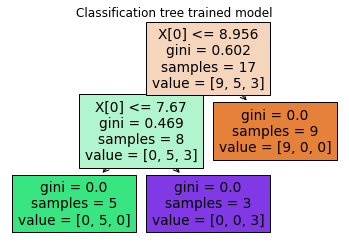

In [35]:
# visualizamos arbol de clasificacion
# value=[H, M, L]
# sample=the number of elements in a particular node.
# gini index=the Gini Impurity of the node.Ti measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.
# It varies between 0 and 1. '0' denotes that all elements belong to a certain class or there exists only one class (pure), and
# '1' denotes that the elements are randomly distributed across various classes (impure).
# Value= It represents the number of elements in the different categories in a node [H, M, L]
from sklearn.tree import plot_tree
plt.figure()
plot_tree(clF, filled=True)
plt.title("Classification tree trained model")
plt.show()

In [36]:
y_train.value_counts()

poverty_index
High             9
Low              5
Middle           3
dtype: int64

In [37]:
clF.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [46]:
clF.get_depth()

2

In [55]:
clF.get_n_leaves()

3

In [86]:

#5. Running predictions on the model
y_pred_model=clF.predict(x_test)
y_pred_model

#H:0,m:1,L:2
# M HHH L
#Ajustamos los datos al modelo
# y_pred_model=y_pred_model.fit(x_test,y_test)

array(['Low', 'High', 'High', 'High', 'Middle'], dtype=object)

In [87]:
y_test=np.array(y_test,dtype='object')
y_test

array([['Low'],
       ['Middle'],
       ['High'],
       ['High'],
       ['Middle']], dtype=object)

In [88]:

df_prediccion=pd.DataFrame(y_test,y_pred_model)
df_prediccion

,0
Low,Low
High,Middle
High,High
High,High
Middle,Middle


[[2 0 0]
 [0 1 0]
 [1 0 1]]


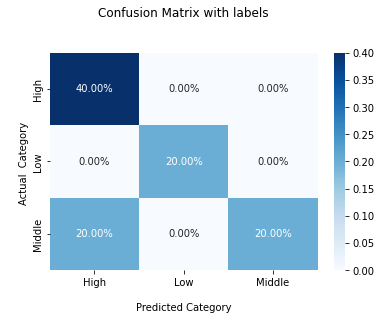

In [89]:
#6. Evaluating and visualizing model performance

# Confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred_model)
print(cf_matrix)

# Plot confusion matrix
import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category');
ax.set_ylabel('\nActual  Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['High','Low','Middle'])
ax.yaxis.set_ticklabels(['High','Low','Middle'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [90]:
# metric 1. precission score
from sklearn.metrics import precision_score
ps=precision_score(y_test,y_pred_model,average='macro')
round(ps*100,2)

88.89

In [91]:
# metric 2. recall score
from sklearn.metrics import recall_score
rs=recall_score(y_test,y_pred_model,average='macro')
round(rs*100,2)

83.33

In [92]:
# metric 3. accuracy
from sklearn.metrics import accuracy_score
accs=accuracy_score(y_test,y_pred_model)
round(accs*100,2)

80.0

In [93]:
print("metric_1 (Precission_Score) :",round(ps*100,2))
print("metric_2 (Recall Score):",round(rs*100,2))
print("metric_3 (Accuracy):",round(accs*100,2))

metric_1 (Precission_Score) : 88.89
metric_2 (Recall Score): 83.33
metric_3 (Accuracy): 80.0
